# This notebook:
- **explores** response data for questions (or items) on a test
- **visualizes** differences between item responses at the state and national levels
- **models** if there is a statistically difference between the mean responses at the state and national levels using t test confidence interval and hypothesis testing

# 0. Load libaries

In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# 1. Load and prep data

In [2]:
df = pd.read_excel('Data/Quiz_Item_Responses.xlsx') 
df.head()

,Item_ID,score_outcome,number_of_responses
0,FL01M_CC_L01_01,INCORRECT,81
1,FL01M_CC_L01_01,CORRECT,799
2,FL01M_CC_L01_02,INCORRECT,70
3,FL01M_CC_L01_02,CORRECT,810
4,FL01M_CC_L01_03,INCORRECT,141


In [3]:
# group by Item_ID and aggregate the sum of number of responses
# add new variable percent_score_outcome_of_total_response, or number of responses / total responses
# filter where score_outcome is correct
groupby = (df.groupby(['Item_ID'])
           .agg({'number_of_responses': 'sum'})
           .rename(columns={'number_of_responses': 'total_responses'}))
df = df.join(groupby, on='Item_ID')
df["percent_score_outcome_of_total_response"]= df["number_of_responses"]/df["total_responses"]*100
df = df[df['score_outcome']=="CORRECT"]
df.head()

,Item_ID,score_outcome,number_of_responses,total_responses,percent_score_outcome_of_total_response
1,FL01M_CC_L01_01,CORRECT,799,880,90.795455
3,FL01M_CC_L01_02,CORRECT,810,880,92.045455
5,FL01M_CC_L01_03,CORRECT,739,880,83.977273
7,FL01M_CC_L01_04,CORRECT,776,879,88.282139
9,FL01M_CC_L01_05,CORRECT,782,879,88.964733


In [4]:
# split item id into parts
df[["Item_1","Item_2","Item_3","Item_4","Item_5"]]= df["Item_ID"].str.split("_", expand = True)
df.head()

,Item_ID,score_outcome,number_of_responses,total_responses,percent_score_outcome_of_total_response,Item_1,Item_2,Item_3,Item_4,Item_5
1,FL01M_CC_L01_01,CORRECT,799,880,90.795455,FL01M,CC,L01,01,None
3,FL01M_CC_L01_02,CORRECT,810,880,92.045455,FL01M,CC,L01,02,None
5,FL01M_CC_L01_03,CORRECT,739,880,83.977273,FL01M,CC,L01,03,None
7,FL01M_CC_L01_04,CORRECT,776,879,88.282139,FL01M,CC,L01,04,None
9,FL01M_CC_L01_05,CORRECT,782,879,88.964733,FL01M,CC,L01,05,None


In [5]:
# item_1 represents a new category that buckets item_ids, or nests item_ids
# where item_1 = test name  and  item_ID = question
# so the data show the individual questions on a test (and its number of responses)

# Questions:
# What is the average number of correct response on a question by test?
# What is the total number of responses to all questions by test?
# What is the average percent of correct responses by test?

# group by item_1 and average number_of_responses, sum total_responses, and average percent

groupby2 = (df.groupby(['Item_1'])
            .agg({'number_of_responses': 'mean',
                  'total_responses': 'sum',
                  'percent_score_outcome_of_total_response': 'mean'})
            .rename(columns={'number_of_responses':'mean_correct_response_per_item',
                         'total_responses':'total_responses_per_item',
                         'percent_score_outcome_of_total_response':'mean_percent_correct_per_item'
                        }))
groupby2

,mean_correct_response_per_item,total_responses_per_item,mean_percent_correct_per_item
Item_1,,,
FL01M,140.006969,56984,71.143569
FL02M,107.210811,40274,51.289734
FL03M,161.177215,73899,51.648672
FL04M,247.029915,102032,56.676054
FL05M,182.365217,74171,55.052027
FL0KM,113.371648,39415,71.830159
G2,147.400000,12669,50.261343
G3,182.777778,3212,55.116006
G4,222.741379,24393,61.338602


In [6]:
# similar output, less code
(df.groupby(['Item_1'])
 .agg({'number_of_responses': ['mean', 'sum'],
      'percent_score_outcome_of_total_response': 'mean'}))

number_of_responses         percent_score_outcome_of_total_response
                      mean     sum                                    mean
Item_1                                                                    
FL01M           140.006969   40182                               71.143569
FL02M           107.210811   19834                               51.289734
FL03M           161.177215   38199                               51.648672
FL04M           247.029915   57805                               56.676054
FL05M           182.365217   41944                               55.052027
FL0KM           113.371648   29590                               71.830159
G2              147.400000    5896                               50.261343
G3              182.777778    1645                               55.116006
G4              222.741379   12919                               61.338602
G5              231.423077   18051                               53.641892
NA01M           886.618510  392772                               63.112870
NA02M           791.377261  306263                               43.074546
NA03M          1429.612048  593289                               50.629055
NA04M          2313.730583  953257                               50.832110
NA05M          2080.108312  825803                               44.860226
NA0KM           618.173333  231815                               74.550137

# 2. Visualize data

In [7]:
groupby2.columns

Index(['mean_correct_response_per_item', 'total_responses_per_item',
       'mean_percent_correct_per_item'],
      dtype='object')

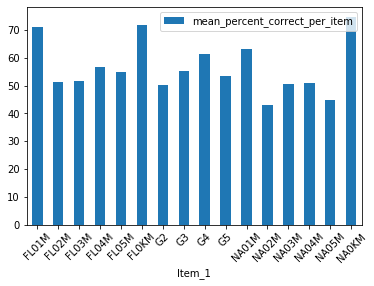

In [8]:
ax = groupby2.plot.bar(y='mean_percent_correct_per_item', rot=45) # join.plot(kind='bar'...) also works

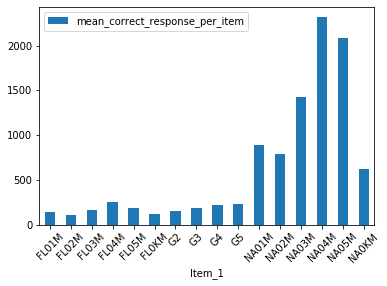

In [9]:
ax = groupby2.plot.bar(y='mean_correct_response_per_item', rot=45) # x value is index when not specified
                                                                    # optional: join['Item_ID'] = join.index for x

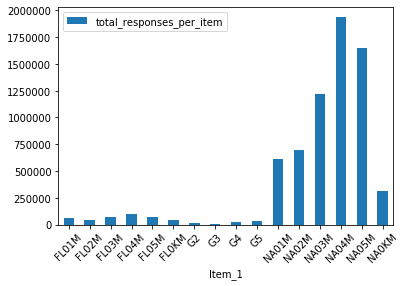

In [10]:
ax = groupby2.plot.bar(y='total_responses_per_item', rot=45) 

In [11]:
# nsize (number of Item_IDs, or questions) per test
df.Item_1.value_counts()

NA01M    443
NA03M    415
NA04M    412
NA05M    397
NA02M    387
NA0KM    375
FL01M    287
FL0KM    261
FL03M    237
FL04M    234
FL05M    230
FL02M    185
G5        78
G4        58
G2        40
G3         9
Name: Item_1, dtype: int64

# 3. Model data

## Is there a significant difference (at the alpha=0.05 level) in the mean correct responses per item between the two independent populations (state tests (FL) and national test (NA))?

## In other words, does the average total correct responses per item differ between FL01 and NA01 tests?

Use t test. Note: t test is used for small samples but still robust enough to use and acts more conservation on large samples.

First, understand (sample) population.

Then, run t test.

    Steps:
        1. set up h0 and ha
        2. set up rejection region, tcrit
        3. gather data, calculate tobs
        4. compare tobs to tcrit

Lastly, evaluate confidence interval of difference in the mean between the two independent populations.

## 3.1. Examine n size and normality of sample populations

In [12]:
# nsize, or question items, in NA01M and NA01M
df.Item_1[(df.Item_1=='NA01M')|(df.Item_1=='FL01M')].value_counts()

NA01M    443
FL01M    287
Name: Item_1, dtype: int64

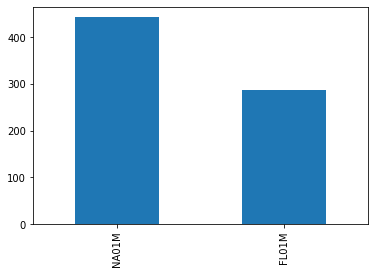

In [13]:
df.Item_1[(df.Item_1=='NA01M')|(df.Item_1=='FL01M')].value_counts().plot(kind='bar') # visual

##### Distribution of number of responses per item

In [14]:
df=df[df.score_outcome=='CORRECT']
na, fl=df[(df.Item_1=='NA01M')]['number_of_responses'], df[(df.Item_1=='FL01M')]['number_of_responses']

In [78]:
na.reset_index()

,index,number_of_responses
0,3445,7196
1,3446,7099
2,3449,6243
3,3450,6413
4,3453,6719
...,...,...
438,4352,65
439,4354,13
440,4356,13
441,4357,10


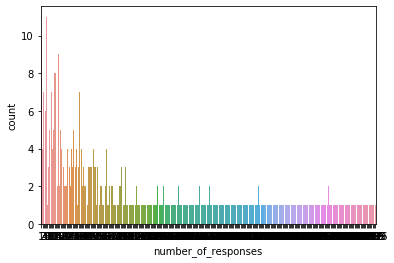

In [81]:
import seaborn as sns
sns.countplot(na) # national tests number of correct responses

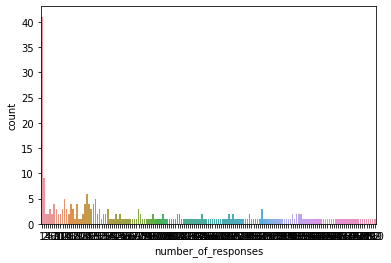

In [83]:
sns.countplot(fl) # florida tests number of correct responses

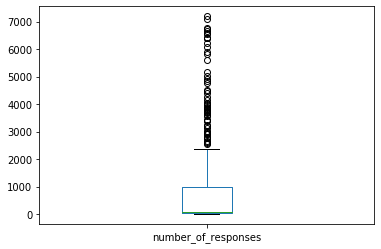

In [52]:
ax = na.plot(kind='box')

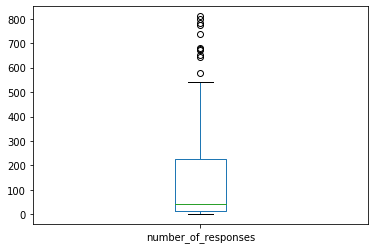

In [41]:
ax = fl.plot(kind='box')

In [53]:
na.describe()

count     443.000000
mean      886.618510
std      1539.416776
min         1.000000
25%        23.000000
50%        79.000000
75%      1001.000000
max      7196.000000
Name: number_of_responses, dtype: float64

In [42]:
fl.describe()

count    287.000000
mean     140.006969
std      180.750243
min        1.000000
25%       12.000000
50%       43.000000
75%      225.000000
max      810.000000
Name: number_of_responses, dtype: float64

In [84]:
# shapiro test for normality
print(stats.shapiro(na[((na >23) & na<7196)])) # outputs t-statistic and pvalue
print(stats.shapiro(fl[(fl>12) & fl<225]))

# validity of parametric tests assumes normal distribution
# shapiro test is used to test h0 hypothesis of normality, or
# that sample data is drawn from normal distribution

# if pvalue < 0.05, so we reject h0 that sample data is drawn from normal distribution

# in both na and fl arrays, we fail to reject the h0 hypothesis and accept the ha
# that the sample data is not drawn from a normal distribution

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
# http://www.sthda.com/english/wiki/normality-test-in-r

(0.6332790851593018, 1.1433908289770367e-29)
(0.7694142460823059, 8.580244973845108e-20)


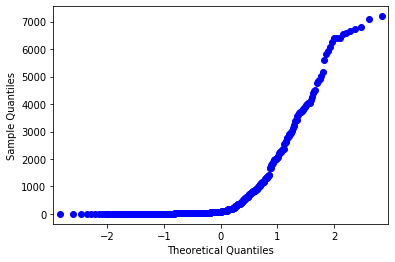

In [85]:
ax = sm.qqplot(na[((na >23) & na<7196)])

# https://stats.stackexchange.com/questions/139708/qq-plot-in-python

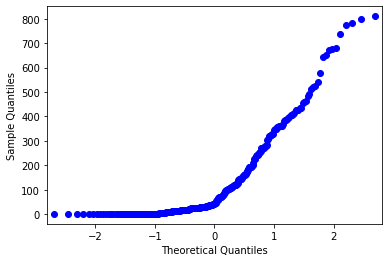

In [86]:
ax = sm.qqplot(fl[(fl>12) & fl<225])

##### Note:

    "You have several options for handling your non normal data. Many tests, including the one sample Z test, T test and ANOVA assume normality. You may still be able to run these tests if your sample size is large enough (usually over 20 items)."
    
[source](https://www.statisticshowto.com/probability-and-statistics/non-normal-distributions/)

## 3.2 Run ttest

### 3.2.1. Hypothesis 
        H0: m1 = m2
        Ha: m1 != m2 
        alpha = 0.05
        two sided test, so alpha/2 = .025

### 3.2.2. Set up rejection region, tcrit

In [13]:
na_n, fl_n= len(na), len(fl)
print('National sample size: ', na_n)
print('Florida sample size: ', fl_n)

National sample size:  443
Florida sample size:  287


In [14]:
std_na, std_fl = np.std(na), np.std(fl)
print('National standard deviation: ', std_na)
print('Florida standard deviation: ', std_fl) # not equal variances

National standard deviation:  1537.678303653417
Florida standard deviation:  180.4350722072859


Samples do not have equal variances. We cannot assume equal variances.

Use Sattertwaite's approximation for degrees of freedom (dof)
 [source](https://www.statisticshowto.com/satterthwaite-formula/)

Instead of dof = n1 + n2 - 2

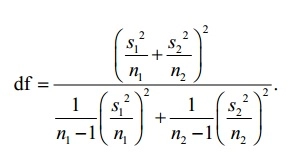


In [15]:
# calculate critical value manually

dof = ( (std_na**2/na_n) + (std_fl**2/fl_n) ) ** 2 / ( (1/(na_n-1)) * (std_na**2/na_n)**2 ) + ( (1/(fl_n-1)) * (std_fl**2/fl_n)**2 )

# df2 used when unequal sample variances and/or unequal sample sizes
# df2 is Sattertwaite's approximation

# rule of thumb is ratio of two stds do not exceed 2 to 1, 
# you would be okay with standard t test, as long as sample sizes not too unequal

dof2 = na_n + fl_n - 2

print("dof (n1+n2-2): ", dof2)
print("dof (Sattertwaite's approximation):  ", dof)

# use ttable to find tcrit for degrees of freedom 505 at alpha = 0.05 level, two-sided so alpha/2 = 0.025
# http://www.ttable.org/student-t-value-calculator.html

ltcrit, utcrit = -1.96, 1.96
print('lower critical value: ', ltcrit)
print('upper critical value: ', utcrit)

dof (n1+n2-2):  728
dof (Sattertwaite's approximation):   505.9817904196625
lower critical value:  -1.96
upper critical value:  1.96


In [16]:
# calculate critical value using package
print ('critical t (using dof = n1 + n2 - 2)= %.3f ' % (stats.t.ppf(1-0.025, dof2)))
print ('critical t (using Sattertwaite dof approximation) = %.3f ' % (stats.t.ppf(1-0.025, dof)))

critical t (using dof = n1 + n2 - 2)= 1.963 
critical t (using Sattertwaite dof approximation) = 1.965 


### 3.3.3. Gather data, calculate tobs

In [17]:
# calculate mean difference
na_mean, fl_mean = np.mean(na), np.mean(fl)
mean_diff = np.subtract(na_mean, fl_mean)
print('National mean of correct response per item: ', na_mean)
print('Florida mean of correct response per item: ', fl_mean)
print('Mean difference between na and fl: ', mean_diff)

National mean of correct response per item:  886.6185101580136
Florida mean of correct response per item:  140.00696864111498
Mean difference between na and fl:  746.6115415168986


**Welch Two Sample t-test**
#####  (unequal variances) ([source](http://www.stat.yale.edu/Courses/1997-98/101/meancomp.htm))

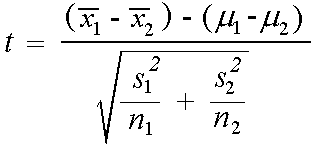

In [20]:
# calculate tobs using welch's t-staistic manually
truemean_diff = 0 # given hypothesis, m1-m2 = 0

std_pooled = np.sqrt( (std_na**2/na_n) + (std_fl**2/fl_n) )
se_meandiff =  std_pooled

tobs = (mean_diff - truemean_diff) / se_meandiff
print("tobs using welch's t-test: ", tobs)

tobs using welch's t-test:  10.112633610981327


In [21]:
# calculate tobs using stats package where variance is not equal
stats.ttest_ind(na,fl,equal_var = False) 

Ttest_indResult(statistic=10.101083938445148, pvalue=8.37743069809173e-22)

**Comparison: Standard independent 2 sample test that assumes equal population variances**
##### Pooled variance (equal variances)

Pooled T Procedures

![image.png](http://www.stat.yale.edu/Courses/1997-98/101/tpool.gif)

to calculate t statistic

![image.png](http://www.stat.yale.edu/Courses/1997-98/101/tstatp.gif)

which has a t(n1 + n2 -2) distribution ([source](http://www.stat.yale.edu/Courses/1997-98/101/meancomp.htm)).

In [18]:
# calculate tobs using pooled variance manually

truemean_diff = 0 # given hypothesis, m1-m2 = 0

std_pooled = np.sqrt( ( ((na_n-1)*(std_na**2)) + ((fl_n-1)*(std_fl**2) ) ) / (na_n+fl_n-2) )
# remove the -1 to get exact stats package result
se_meandiff =  std_pooled * np.sqrt( (1/na_n) + (1/fl_n) )

tobs = (mean_diff - truemean_diff) / se_meandiff
print("tobs using pooled variance: ", tobs)

tobs using pooled variance:  8.18726857528586


In [19]:
# calculate tobs using stats package where variance is equal
stats.ttest_ind(na,fl,equal_var = True)

Ttest_indResult(statistic=8.177978184821752, pvalue=1.2828122599499164e-15)

#### Review Stats Package (tobs,tcrit,pvalue)

   **NOTE:**

    "We can use this test [scipy.stats.ttest_ind], if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. 

    The test measures whether the average (expected) value differs significantly across samples. 

    If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. 

    If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages."
   [source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

In [23]:
# tcrit, tobs, and tobs pvalue using stats package

print('National mean of correct response per item: ', na_mean)
print('Florida mean of correct response per item: ', fl_mean)
print('Mean difference between na and fl: ', mean_diff)

print ('DF =  %.3f' % dof) 

tobs, pvalue = stats.ttest_ind(na,fl,equal_var = False)
tcrit = stats.t.ppf(1-0.025, dof)

print ('tobs = %.3f' % tobs)
print ('pvalue = %.3f' % pvalue)
print ('tcrit = %.3f' % tcrit)

National mean of correct response per item:  886.6185101580136
Florida mean of correct response per item:  140.00696864111498
Mean difference between na and fl:  746.6115415168986
DF =  505.982
tobs = 10.101
pvalue = 0.000
tcrit = 1.965


### 3.3.4. Compare tobs to tcrit

tobs (10.101) is greater than tcrit (1.965) and lies in the rejection region.

We fail to reject the null hypothesis and accept that the means of correct responses per item do not differ between the two indepedent populations (state tests (FL) and national test (NA)), t(505) = 10.101, p>0.05.

## 3.4. Confidence interval using t-test

In [24]:
print('Mean difference between na and fl: ', mean_diff)
print('Standard deviation of the mean difference between na and fl: ', se_meandiff)

Mean difference between na and fl:  746.6115415168986
Standard deviation of the mean difference between na and fl:  73.82958487748945


##### Confidence interval for the difference in two means ([source](http://www.stat.yale.edu/Courses/1997-98/101/meancomp.htm))

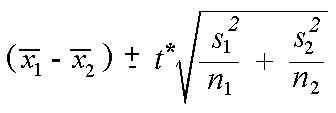

In [25]:
def ci(mean_diff, se_meandiff):
    tcrit = {95:1.96, 99:2.58, 90:1.65}
    for key in tcrit:
        lci, uci = mean_diff - (tcrit[key]*se_meandiff), mean_diff + (tcrit[key]*se_meandiff)
        print(key, "% confidence interval: ", lci, uci)
        
ci(mean_diff, se_meandiff)

95 % confidence interval:  601.9055551570193 891.3175278767778
99 % confidence interval:  556.1312125329757 937.0918705008214
90 % confidence interval:  624.792726469041 868.4303565647562


In [26]:
import statsmodels.stats.api as sm

cm = sm.CompareMeans(sm.DescrStatsW(na), sm.DescrStatsW(fl))
print(cm.tconfint_diff(usevar='unequal'))   # 95 % confidence interval 

(601.3611615418777, 891.8619214919195)
